---

#### Multi-Agent AI Individual Coursework

Didar Yedilkhan 18141144, didar.yedilkhan.18@ucl.ac.uk

Business Analytics (with specialisation in CS)

---
---
---


# COMP0124 MAAI Individual Coursework 

This individual Coursework has two parts, which is worth 50 points (50% of your overall score). The first part is about the Matrix Game, and the second part concerns Multi-Agent Reinforcement Learning.

## Instructions
1.   To start this CW, please duplicate this notebook at first:
  - Choose "File -> Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   This is a coding assignment, please write your code at `### TODO ###` blocks. There is an explanation question in Part II, please use  𝐿𝐴𝑇𝐸𝑋 or Markdown to type your answer.
3.   Before submitting your notebook, **make sure that it runs without errors**, we also provide a validation tool in the end of this notebook.
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell.
  - Please do not change any methods or variables' name in the notebook, otherwise, you cannot get marking correctly.
  - We would not help you debug the code, if we cannot run your submitted notebook, you will get zero point. 
4.  Download your notebook and submit it on Moodle.
  - Click on "File -> Download .ipynb".
  - Rename your notebook to ***firstname_lastname_studentnumber.ipynb***. (Please strictly follow the naming requirement.)
  - Upload to Moodle.
5. This CW would due by **23:55 26/04/2019**, please checkout the [submission entrance](https://moodle-1819.ucl.ac.uk/mod/assign/view.php?id=1070705) in the Moodle.
6. If you have any question, please contact TAs: [Ying Wen](mailto:ying.wen@cs.ucl.ac.uk) and [Minne Li](minne.li@cs.ucl.ac.uk).

## Part I: Matrix Game (26 points)

We start with the simplest setting: Matrix Game (a.k.a Stage Game/Normal Form Game). In this part, you will try to solve the matrix game with full knowledge of the payoff for each player in the game.



Given a two-player, two-action matrix game, we have the payoff matrices as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right]
$$

Each player selects an action from the action space $\{1,2\}$ which determines the payoffs to the players. If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively. For example, if both players choose action $1$, then the player 1 would have $r^1_{11}=0$ and player 1 would receive $r^2_{11}=3$.

Then, we can use $\alpha\in [0,1] $ represents the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the expected payoffs for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r_{21}-r^1_{22}\right)+r^1_{22} \end{aligned}
$$
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r_{21}-r^2_{22}\right)+r^2_{22}\end{aligned}
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22} .\end{aligned}
$$



#### Set up matrix game (4 points)



In [0]:
import numpy as np
from copy import deepcopy


def U(payoff):
    
    ########### TODO: Compute u (1 point) ###########
    
    u = payoff[0][0] - payoff[0][1] - payoff[1][0] + payoff[1][1]
    
    ########### END TODO ############################
    
    return u
  
    
# expected payoff

def V(alpha, beta, payoff):
   
    ########### TODO: Compute expected payoff of given strategies alpha and beta (1 point) ###########
    
    u = U(payoff)
    
    v = u * alpha * beta + alpha * (payoff[0][1] - payoff[1][1]) + beta * (payoff[1][0] - payoff[1][1]) + payoff[1][1]
    
    ########### END TODO ##############################################################################
   
    return v


payoff_0 = np.array([[0, 3], 
                     [1, 2]])

payoff_1 = np.array([[3, 2], 
                     [0, 1]])

pi_alpha = 0. # init policy for player 1
pi_beta = 0.9 # init policy for player 2

########### TODO:Give nash strategy of given matrix game (2 points) ###########

### there is no NE in a pure strategy which means that one must exist in mixed strategies
### I found Nash manually by solving the differential equations and setting two partial Eqs in IGA to zero 
### R1: 3-3q = q+2-2q => q = 1/2
### R2: 3p = 2p+1-p   => p = 1/2

pi_alpha_nash = 0.5  # nash strategy for player 1
pi_beta_nash = 0.5   # nash strategy for player 2

########### END TODO ###############################################################

u_alpha = U(payoff_0)
u_beta = U(payoff_1)

#### Infinitesimal Gredient Ascent (IGA) (6 points)

To find the optimal strategies, here we use the Infinitesimal Gradient Ascent (IGA) to adjust the strategies at each iteration by considering the effect of changing its strategy on its expected payoffs.  These effects can be captured by calculating the partial derivatives of its expected payoff with respect to its strategy.

$$
\begin{aligned} \frac{\partial V^{1}(\alpha, \beta)}{\partial \alpha} &=\beta u^1+\left(r^1_{12}-r^1_{22}\right) \\ \frac{\partial V^{2}(\alpha, \beta)}{\partial \beta} &=\alpha u^2+\left(r^2_{21}-r^2_{22}\right). \end{aligned}
$$

Accodirng the gradient from partial derivatives, players could adjust the strategies in the direction of current gradient with some step size $\eta$. If $(\alpha_k, \beta_k)$ is the strategy pair at $k$th iteration, then using IGA update the strategies would get the new strategies:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [0]:
def IGA(pi_alpha,
        pi_beta,
        payoff_0,
        payoff_1,
        u_alpha,
        u_beta,
        iteration=1000, # iteration number
        eta=0.01 # step size
       ):
    
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
       
        ########### TODO:Implement IGA (6 points) ###########
        
        pi_alpha_gradient = pi_beta * u_alpha + (payoff_0[0][1] - payoff_0[1][1])
        pi_beta_gradient = pi_alpha * u_beta + (payoff_1[1][0] - payoff_1[1][1])
        
        pi_alpha_next = pi_alpha + eta * pi_alpha_gradient
        pi_beta_next = pi_beta + eta * pi_beta_gradient
                
        ########### END TODO ###############################
       
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### WoLF-IGA (8 points)

The above IGA algorithm uses constant step size. A specific method for varying the learning rate here is WoLF (Win or Learn Fast),  it allows the step size varies over time. Let $\alpha^{e}$ and $\beta^{e}$ represent the equilibrium strategies of two players, now we have new updated rules for WoLF-IGA algorithm:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta_k^{1} \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta_k^{2}  \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

where

$$
\eta_{k}^{1}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^1\left(\alpha_{k}, \beta_{k}\right)>V^1\left(\alpha^{e}, \beta_{k}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$
$$
\eta_{k}^{2}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^2\left(\alpha_{k}, \beta_{k}\right)>V^2\left(\alpha_{k}, \beta^{e}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$.



In [0]:
def WoLF_IGA(pi_alpha,
             pi_beta, 
             payoff_0, 
             payoff_1,
             u_alpha,
             u_beta,
             pi_alpha_nash, 
             pi_beta_nash,
             iteration=1000,
             eta_min=0.01, # min step size
             eta_max=0.04 # max step size 
            ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    
    for i in range(iteration):
        
        ########### TODO:Implement WoLF-IGA (6 points) ###########
        
        ### conditions ###
        
        if V(pi_alpha, pi_beta, payoff_0) > V(pi_alpha_nash, pi_beta, payoff_0):
            eta_1 = eta_min
        else:
            eta_1 = eta_max
        
        if V(pi_alpha, pi_beta, payoff_1) > V(pi_alpha, pi_beta_nash, payoff_1):
            eta_2 = eta_min
        else:
            eta_2 = eta_max
    
        ### main ###
        
        pi_alpha_gradient = pi_beta * u_alpha + (payoff_0[0][1] - payoff_0[1][1])
        pi_beta_gradient = pi_alpha * u_beta + (payoff_1[1][0] - payoff_1[1][1])
        
        pi_alpha_next = pi_alpha + eta_1 * pi_alpha_gradient
        pi_beta_next = pi_beta + eta_2 * pi_beta_gradient
        
        ########### END TODO #####################################
        
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### IGA-PP (8 points)

The IGA agent uses the gradient from other's current strategies to adjust its strategy. Suppose that one player knows the change direction of the other’s strategy,
i.e., strategy derivative, in addition to its current strategy.
Then the player can forecast the other’s strategy and adjust its strategy in response to the forecasted strategy. Thus the strategy update rules is changed to by using the policy prediction (IGA-PP):

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta\frac{\partial V^{1}\left(\alpha_{k}, \beta_{k} + \gamma \partial_{\beta}V^{2}\left(\alpha_{k}, \beta_{k}\right)  \right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta  \frac{\partial V^{2}\left(\alpha_{k} + \gamma \partial_{\alpha} V^{1}\left(\alpha_{k}, \beta_{k} \right) , \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [0]:
def IGA_PP(pi_alpha,
           pi_beta,
           payoff_0,
           payoff_1,
           u_alpha,
           u_beta,
           iteration=10000,
           eta=0.01, # step size
           gamma=0.01 # step size for policy prediction
          ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        
        ########### TODO:Implement IGA-PP (6 points) ###########
                      
        ### the first part of these two expressions means a new_alpha and new_beta with updated rules
        ### The math expressions at the top of the fraction are simplified expressions for partial derivative. 
        ### They have the same meaning as partial beta.
               
        pi_alpha_gradient = (pi_beta  + gamma * (pi_alpha * u_beta + (payoff_1[1][0] - payoff_1[1][1]))) * u_alpha + (payoff_0[0][1] - payoff_0[1][1])
        pi_beta_gradient  = (pi_alpha + gamma * (pi_beta * u_alpha + (payoff_0[0][1] - payoff_0[1][1]))) * u_beta + (payoff_1[1][0] - payoff_1[1][1])
        
        pi_alpha_next = pi_alpha + eta * pi_alpha_gradient 
        pi_beta_next = pi_beta + eta * pi_beta_gradient
                
        ########### END TODO ####################################
        
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### Run and compare different methods

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

FONTSIZE = 12

# Tool to plot the learning dynamics
def plot_dynamics(history_pi_0, history_pi_1, pi_alpha_gradient_history, pi_beta_gradient_history, title=''):
    colors = range(len(history_pi_1))
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(history_pi_0, history_pi_1, c=colors, s=1)
    ax.scatter(0.5, 0.5, c='r', s=15., marker='*')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_label('Iterations', rotation=270, fontsize=FONTSIZE)

    skip = slice(0, len(history_pi_0), 50)
    ax.quiver(history_pi_0[skip],
              history_pi_1[skip],
              pi_alpha_gradient_history[skip],
              pi_beta_gradient_history[skip],
              units='xy', scale=10., zorder=3, color='blue',
              width=0.007, headwidth=3., headlength=4.)

    ax.set_ylabel("Policy of Player 2", fontsize=FONTSIZE)
    ax.set_xlabel("Policy of Player 1", fontsize=FONTSIZE)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=FONTSIZE+8)
    plt.tight_layout()
    plt.show()


We have set up the running code for three algorithms on given matrix game as below. You can run/validate and tune (e.g., try different parameters, observe the convergence and learning dynamics) the results by yourself.

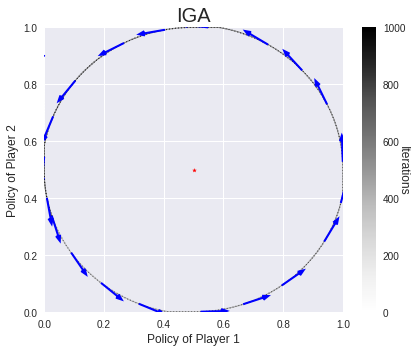

IGA Done


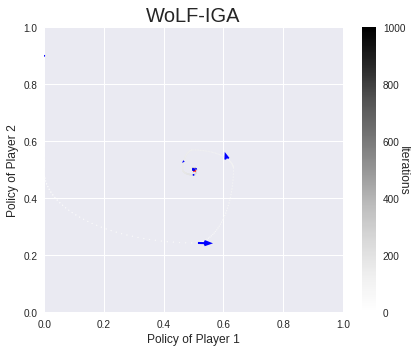

WoLF-IGA Done


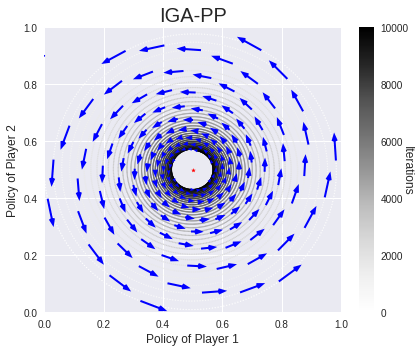

IGA-PP Done


In [54]:
agents = ['IGA', 'WoLF-IGA', 'IGA-PP']

for agent in agents:

  if agent == 'IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA(pi_alpha,
                                     pi_beta,
                                     payoff_0,
                                     payoff_1,
                                     u_alpha,
                                     u_beta,
                                     iteration=1000, # iteration number
                                     eta=0.01 # step size
                                    )
  elif agent == 'WoLF-IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = WoLF_IGA(pi_alpha,
                                          pi_beta,
                                          payoff_0,
                                          payoff_1,
                                          u_alpha,
                                          u_beta,
                                          pi_alpha_nash=pi_alpha_nash,
                                          pi_beta_nash=pi_beta_nash,
                                          iteration=1000, # iteration number
                                          eta_min=0.01, # min step size
                                          eta_max=0.04 # max step size 
                                         )


  elif agent == 'IGA-PP':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA_PP(pi_alpha,
                                        pi_beta,
                                        payoff_0,
                                        payoff_1,
                                        u_alpha,
                                        u_beta,
                                        iteration=10000, # iteration number
                                        eta=0.01, # step size
                                        gamma=0.01 # step size for policy prediction
                                       )


  plot_dynamics(pi_alpha_history,
                pi_beta_history,
                pi_alpha_gradient_history,
                pi_beta_gradient_history,
                agent)
  
  print('{} Done'.format(agent))

## Part II: Multi-Agent Reinforcement Learning (24 points)

For this part of the coursework, you will implement the [multi-agent deep deterministic policy gradient algorithm (MADDPG)](https://arxiv.org/abs/1706.02275) and get to see it work on the Waterworld environment, which is a modifed version of the Waterworld based on [Cooperative Multi-Agent Control Using Deep
Reinforcement Learning](http://ala2017.it.nuigalway.ie/papers/ALA2017_Gupta.pdf).

### Environment Description
![waterworld](https://www.dropbox.com/s/kwfdq7301a4fkw6/demo.gif?raw=1)

In this environment, agents (shown in blue) need to cooperate to capture moving food targets (shown in green) while avoiding poison targets (shown in red). Both the observation and action spaces are continuous, and the agents move around by applying a two-dimensional force. Each agent has several range-limited sensors facing outward with uniform angular spacing. The sensors are used to make distance and velocity measurements of other agents, food targets and poison targets. The agents receive a reward each time they collaborate to capture a food target, and are penalized when they collide with a poisoned target. They also receive an action penalty defined as the square norm of the force applied. Agents need to cooperate with each other as the environment needs exactly **n_coop** agents to catch food.

The default number of sensors was set as 30, resulting in a 212-dimensional observation for each agent. The food reward was set to 10, and the poison penalty was −1. We also added a reward of 0.01 for encountering the food targets to ease exploration.

### Download Requirements and Set the Environment
The following command will download the required scripts and set up the environment. Although **you do not need to modify any of them**, a good understanding of **model.py** and **memory.py** from [**CW_MARL.tgz**](https://www.dropbox.com/s/2mafz9eo8rczq75/CW_MARL.tgz) file can help you with the implementation of MADDPG.

In [55]:
!wget https://www.dropbox.com/s/2mafz9eo8rczq75/CW_MARL.tgz
!tar -zxf CW_MARL.tgz
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

--2019-04-12 20:49:22--  https://www.dropbox.com/s/2mafz9eo8rczq75/CW_MARL.tgz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2mafz9eo8rczq75/CW_MARL.tgz [following]
--2019-04-12 20:49:23--  https://www.dropbox.com/s/raw/2mafz9eo8rczq75/CW_MARL.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3ff7d0518265d920f4b9947c6.dl.dropboxusercontent.com/cd/0/inline/Ae68JUZ9hXiQ18VzFwAfwaXvj0UpR1WCZ7YBaxPpHnDn7t8DAV6RIwDlqhB6GC2Y1RF_rcMywC2a-Y3XTjquyZmv8Xj_taJD29L9v9hVVWV7GA/file# [following]
--2019-04-12 20:49:23--  https://uce3ff7d0518265d920f4b9947c6.dl.dropboxusercontent.com/cd/0/inline/Ae68JUZ9hXiQ18VzFwAfwaXvj0UpR1WCZ7YBaxPpHnDn7t8DAV6RIwDlqhB6GC2Y1RF_rcMywC2a-Y3XTjquyZmv8Xj_taJD29L9v9hVVWV7GA/file
Resolving uce3ff7d0518

### Implement the Parameter Update for MADDPG
Implement MADDPG within the following framework. Based on the MADDPG update rule, complete the following functions with `# TODO` statements, which is called by the **update_policy()** function.

###TODO: Compute the current Q value (2 points)
Feed the **state** and **action** into **critics** to compute the current Q value.
In MADDPG, the **critics** $Q^{\mu}_i (\mathbf{x},a_1, ..., a_N)$ is a *centralized action-value function* that takes as input the actions of all agents, $a_1,\ldots, a_N$ following $N$ continuous policies $\mu_i$, in addition to some state information $\mathbf{x}$, and outputs the Q-value for agent $i$. In the simplest case, $\mathbf{x}$ could consist of the observations of all agents, $\mathbf{x} = (o_1, ..., o_N)$.

In [0]:
########### TODO:Compute the current Q value (2 points) ###########

def compute_current_q_value(whole_state, whole_action, critics, agent):
  
  return critics[agent](whole_state, whole_action)

### TODO: Compute TD-target (2 points)
Use reward scaling in Q functions with the given **scale_reward** ratio.
In MADDPG, the TD-target is given by
$y = r_i + \gamma\, Q^{\mu'}_i(\mathbf{x}', a_1',\ldots,a_N')\big|_{a_j'=\mu'_j(o_j)}$.

In [0]:
########### TODO:Compute the TD-target (2 points) ###########

def compute_target_q(target_Q, reward_i, scale_reward, gamma):
  
  return (target_Q * gamma) + (reward_i * scale_reward)

### TODO: Compute the actor loss (10 points)
Given the gradient for the expected return in MADDPG as:
$\nabla_{\theta_i} J(\mu_i) = \mathbb{E}_{\mathbf{x},a \sim \mathcal{D}}[\nabla_{\theta_i} \mu_i(a_i|o_i) \nabla_{a_i} Q^{\mu}_i (\mathbf{x},a_1, ..., a_N)|_{a_i=\mu_i (o_i)}]$,
where $\mathbf{x}$ consists of the observations of all agents, $\mathbf{x} = (o_1, ..., o_N)$, and $\mu_{\theta_i}$ represents $N$ continuous policies w.r.t. parameters $\theta_i$ (abbreviated as $\mu_i$).
The experience replay buffer $\mathcal{D}$ contains the tuples $(\mathbf{x},\mathbf{x}',a_1,\ldots,a_N,r_1,\ldots,r_N)$, recording experiences of all agents.

**You don't need to modify any other lines except the section with** `# TODO` **statements.**

In [0]:
from model import Critic, Actor
import torch as th
from copy import deepcopy
from memory import ReplayMemory, Experience
from torch.optim import Adam
import torch.nn as nn
import numpy as np


def soft_update(target, source, t):
  for target_param, source_param in zip(target.parameters(),
                                        source.parameters()):
    target_param.data.copy_(
      (1 - t) * target_param.data + t * source_param.data)

    
class MADDPG:
  def __init__(self, n_agents, dim_obs, dim_act, batch_size,
               capacity, episodes_before_train, scale_reward):
    self.actors = [Actor(dim_obs, dim_act) for i in range(n_agents)]
    self.critics = [Critic(n_agents, dim_obs,
                           dim_act) for i in range(n_agents)]
    self.actors_target = deepcopy(self.actors)
    self.critics_target = deepcopy(self.critics)

    self.n_agents = n_agents
    self.n_states = dim_obs
    self.n_actions = dim_act
    self.memory = ReplayMemory(capacity)
    self.batch_size = batch_size
    self.use_cuda = th.cuda.is_available()
    self.episodes_before_train = episodes_before_train
    self.scale_reward = scale_reward

    self.GAMMA = 0.99 #0.95
    self.tau = 0.001 #0.01

    self.var = [1.0 for i in range(n_agents)]
    self.critic_optimizer = [Adam(x.parameters(),
                                  lr=0.0003) for x in self.critics]   #0.001
    self.actor_optimizer = [Adam(x.parameters(),
                                 lr=0.0001) for x in self.actors]

    if self.use_cuda:
      for x in self.actors:
        x.cuda()
      for x in self.critics:
        x.cuda()
      for x in self.actors_target:
        x.cuda()
      for x in self.critics_target:
        x.cuda()

    self.steps_done = 0
    self.episode_done = 0

  def update_policy(self):
    # do not train until exploration is enough
    if self.episode_done <= self.episodes_before_train:
      return None, None

    ByteTensor = th.cuda.ByteTensor if self.use_cuda else th.ByteTensor
    FloatTensor = th.cuda.FloatTensor if self.use_cuda else th.FloatTensor

    # the list of loss for each agent
    c_loss = []
    a_loss = []
    
    for agent in range(self.n_agents):
      transitions = self.memory.sample(self.batch_size)
      batch = Experience(*zip(*transitions))
      non_final_mask = ByteTensor(list(map(lambda s: s is not None,
                                           batch.next_states)))
      # state_batch: batch_size x n_agents x dim_obs
      state_batch = th.stack(batch.states).type(FloatTensor)
      action_batch = th.stack(batch.actions).type(FloatTensor)
      reward_batch = th.stack(batch.rewards).type(FloatTensor)
      # : (batch_size_non_final) x n_agents x dim_obs
      non_final_next_states = th.stack(
        [s for s in batch.next_states
         if s is not None]).type(FloatTensor)

      # for current agent
      
      self.critic_optimizer[agent].zero_grad()
      whole_state = state_batch.view(self.batch_size, -1)
      whole_action = action_batch.view(self.batch_size, -1)
      current_Q = compute_current_q_value(whole_state, whole_action,
                                  self.critics, agent)

      non_final_next_actions = [
        self.actors_target[i](non_final_next_states[:,
                              i,
                              :]) for i in range(
          self.n_agents)]
      non_final_next_actions = th.stack(non_final_next_actions)
      non_final_next_actions = (
        non_final_next_actions.transpose(0,
                                         1).contiguous())

      target_Q = th.zeros(
        self.batch_size).type(FloatTensor)

      target_Q[non_final_mask] = self.critics_target[agent](
        non_final_next_states.view(-1, self.n_agents * self.n_states),
        non_final_next_actions.view(-1,
                                    self.n_agents * self.n_actions)
      ).squeeze()

      target_Q = compute_target_q(target_Q.unsqueeze(1),
                                  reward_batch[:, agent].unsqueeze(1),
                                  self.scale_reward, self.GAMMA)

      loss_Q = nn.MSELoss()(current_Q, target_Q.detach())
      loss_Q.backward()
      self.critic_optimizer[agent].step()
      c_loss.append(loss_Q)

      self.actor_optimizer[agent].zero_grad()
      
      ########### TODO:Compute the actor loss (10 points)#######
      ## For your reference, the actor loss of                ##
      ##   single-agent DDPG can be computed as:              ##
      ##                                                      ##
      ##     actor_loss = -self.critic(                       ##
      ##       state_batch, self.actor(state_batch))          ##
      ##     actor_loss = actor_loss.mean()                   ##
      ##                                                      ##
                      
      action_batch[:, agent, :] = self.actors[agent](state_batch[:, agent, :])
      whole_action = action_batch.view(self.batch_size, -1)
      
      actor_loss = -self.critics[agent](whole_state, whole_action)
      actor_loss = actor_loss.mean()
      
      ################### End of TODO ##########################
      
      actor_loss.backward()
      self.actor_optimizer[agent].step()
      a_loss.append(actor_loss)

    if self.steps_done % 100 == 0 and self.steps_done > 0:
      for i in range(self.n_agents):
        soft_update(self.critics_target[i], self.critics[i], self.tau)
        soft_update(self.actors_target[i], self.actors[i], self.tau)

    return c_loss, a_loss

  def select_action(self, state_batch):
    # state_batch: n_agents x state_dim
    actions = th.zeros(
      self.n_agents,
      self.n_actions)
    FloatTensor = th.cuda.FloatTensor if self.use_cuda else th.FloatTensor
    for i in range(self.n_agents):
      sb = state_batch[i, :].detach()
      act = self.actors[i](sb.unsqueeze(0)).squeeze()

      act += th.from_numpy(
        np.random.randn(2) * self.var[i]).type(FloatTensor)

      if self.episode_done > self.episodes_before_train and \
          self.var[i] > 0.05:
        self.var[i] *= 0.99998
      act = th.clamp(act, -1.0, 1.0)

      actions[i, :] = act
    self.steps_done += 1

    return actions

### Training Environment Setup
The following script will test the MADDPG algorithm within the Waterworld environment. **You do not need to modify any of them**, although you can change the arguments within the **args** dict to test the algorithm with different environment settings.

In [0]:
from waterworld import MAWaterWorld
import seaborn as sns
import matplotlib.pyplot as plt
import easydict
import argparse
from gym.logger import set_level
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0)
display.start()

set_level(40)

# You can change the arguments to test the algorithm with different settings
args = easydict.EasyDict({
    "n_pursuers": 2,
    "n_evaders": 50,
    "n_poison": 50,
    "food_reward": 10.0,
    "poison_reward": -1.0,
    "encounter_reward": 0.01,
    "n_coop": 2,
    "capacity": 1000000,
    "batch_size": 250,    #1000
    "episodes_before_train": 10
})

food_reward = args.food_reward
poison_reward = args.poison_reward
encounter_reward = args.encounter_reward
n_coop = args.n_coop
scale_reward = 0.01

world = MAWaterWorld(n_pursuers=args.n_pursuers, n_evaders=args.n_evaders,
                     n_poison=args.n_poison, obstacle_radius=0.04,
                     food_reward=food_reward,
                     poison_reward=poison_reward,
                     encounter_reward=encounter_reward,
                     n_coop=n_coop,
                     sensor_range=0.2, obstacle_loc=None, )

np.random.seed(1234)
th.manual_seed(1234)
world.seed(1234)
n_agents = world.n_pursuers
n_states = world._pursuers[0]._obs_dim
n_actions = 2
capacity = args.capacity
batch_size = args.batch_size

episodes_before_train = args.episodes_before_train

maddpg = MADDPG(n_agents, n_states, n_actions, batch_size, capacity,
                episodes_before_train, scale_reward)


### Run MADDPG Training within Waterworld Environment
The following command will run the training process, the default number of training episodes and episode length are set to 100 and 1000 respectively. Make yourself a cup of tea as the training takes some time.

In [60]:
n_episode = 100 
max_steps = 1000
reward_record = []
var_record = []

FloatTensor = th.cuda.FloatTensor if maddpg.use_cuda else th.FloatTensor

for i_episode in range(n_episode):
  obs = world.reset()
  obs = np.stack(obs)
  
  if isinstance(obs, np.ndarray):
    obs = th.from_numpy(obs).float()
  total_reward = 0.0
  rr = np.zeros((n_agents,))
  
  for t in range(max_steps):
    obs = obs.type(FloatTensor)
    action = maddpg.select_action(obs).data.cpu()
    obs_, reward, done, _ = world.step(action.numpy())

    reward = th.FloatTensor(reward).type(FloatTensor)
    obs_ = np.stack(obs_)
    obs_ = th.from_numpy(obs_).float()
    
    if t != max_steps - 1:
      next_obs = obs_
    else:
      next_obs = None

    total_reward += reward.sum()
    rr += reward.cpu().numpy()
    maddpg.memory.push(obs.data, action, next_obs, reward)
    obs = next_obs

    c_loss, a_loss = maddpg.update_policy()
  
  maddpg.episode_done += 1
  
  print('Episode: %d, reward = %f, explore_var = %f'
        % (i_episode, total_reward, maddpg.var[0]))
  reward_record.append(np.append(total_reward.cpu().numpy(), rr))
  var_record.append(maddpg.var[0])

  if maddpg.episode_done == maddpg.episodes_before_train:
    print('training now begins...')
    print('MADDPG on WaterWorld\n' +
          'scale_reward=%f\n' % scale_reward +
          'agent=%d' % n_agents +
          ', coop=%d' % n_coop +
          ' \nlr=0.001, 0.0001, sensor_range=0.3\n' +
          'food=%f, poison=%f, encounter=%f' % (
            food_reward,
            poison_reward,
            encounter_reward))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 0, reward = -78.971497, explore_var = 1.000000
Episode: 1, reward = -89.654869, explore_var = 1.000000
Episode: 2, reward = -80.541580, explore_var = 1.000000
Episode: 3, reward = -76.794479, explore_var = 1.000000
Episode: 4, reward = -92.241837, explore_var = 1.000000
Episode: 5, reward = -81.834930, explore_var = 1.000000
Episode: 6, reward = -85.452560, explore_var = 1.000000
Episode: 7, reward = -92.743546, explore_var = 1.000000
Episode: 8, reward = -93.764008, explore_var = 1.000000
Episode: 9, reward = -68.735504, explore_var = 1.000000
training now begins...
MADDPG on WaterWorld
scale_reward=0.010000
agent=2, coop=2 
lr=0.001, 0.0001, sensor_range=0.3
food=10.000000, poison=-1.000000, encounter=0.010000
Episode: 10, reward = -74.404305, explore_var = 1.000000
Episode: 11, reward = -42.920872, explore_var = 0.980198
Episode: 12, reward = -22.600063, explore_var = 0.960789
Episode: 13, reward = -8.551167, explore_var = 0.941764
Episode: 14, reward = -20.661001, explore_

### Tool: Plot the Training Curve (Reward w.r.t Episodes)
You can use the following command to plot the training curve (**after** the model is trained with given **n_episode**s).

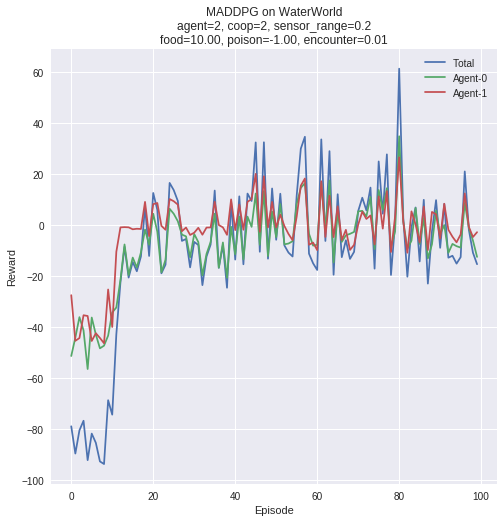

In [61]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(reward_record)), np.array(reward_record))
ax1.set_title('MADDPG on WaterWorld\n' +
                         'agent=%d' % n_agents +
                         ', coop=%d' % n_coop +
                         ', sensor_range=0.2\n' +
                         'food=%.2f, poison=%.2f, encounter=%.2f' % (
                           food_reward,
                           poison_reward,
                           encounter_reward))
ax1.set_ylabel('Reward')
ax1.set_xlabel('Episode')
ax1.legend(['Total'] + ['Agent-%d' % i for i in range(n_agents)])

plt.show()

### Tool: Render the Environment to Check the Behaviour of Agents
You can also render the Waterworld environment and see the behaviour of agents after training.

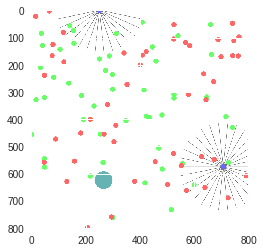

In [62]:
render_steps = 5
obs = world.reset()
obs = np.stack(obs)
if isinstance(obs, np.ndarray):
  obs = th.from_numpy(obs).float()
for t in range(render_steps):
    plt.imshow(world.render(screen_size=800))
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    obs = obs.type(FloatTensor)
    action = maddpg.select_action(obs).data.cpu()
    obs_, reward, done, _ = world.step(action.numpy())
    
ipythondisplay.clear_output(wait=True)

### TODO: Search for Better Hyperparameters (10 points)
The choice of hyperparameters in Deep Reinforcement Learning (especially MARL) can have a significant impact on model performance. The default setting of hyperparameters can already result in some improvements than the random policy but is far from good enough. In this part, you are encouraged to explore and search for better hyperparameters and give in-depth analysis about how those hyperparameters are affecting the training of MADDPG. Points will be given based on both your model performance (reward) and your analysis report. The following section gives you a brief example of what you should cover in the report.

---
---

*   What hyperparameters did you choose? And why?

---
--- 

Suitable hyperparameters are often problem-specific and there are many methods for tuning them such as grid search, random search, simulated annealing, bandit-optimization, and black-box Bayesian Optimization. Another way is a manual tuning, which is based on general understanding of the environment and problem. Knowing that the optimal hyperparameter combination is often not intuitive, I do not expect a high performance based on these settings, but hope to get at least slightly improvements.  

I kept the settings of the environment unchanged, and considered only hyperparameters required for the model. 

As hyperparameters for the model I chose actor's and critic's gradient descent learning rate, the coefficient for the soft update, batch size for gradient descent and future discount factor for reward.  
    
---
---     
    
*   How these hyperparameters affect the performance of the algorithm?

1) Knowing that for each agent the actor network’s learning rate by Adam optimizer is 0.0001 and the critic’s learning rate is 0.001, ten times difference, I changed the critic's rate from 0.001 to 0.0003. These changes allow the critic still to learn faster than the actor, but now not as huge as before. Since the actor network’s learning relies on the critic network, hope to get better results. 

2) For the target networks, a soft update factor value changed from 0.01 to 0.001 -  this value allows to get the right balance between learning speed and learning stability.

3) I decreased the batch size (the number of training examples in one forward/backward pass) from 1000 to 250. Knowing that there is a tradeoff between accuracy and speed, I hope that using small batch sizes allows me to achieve the training stability and generalization performance. Also, I expect that smaller batch will result generally in rapid learning but with a volatile learning process.   

4) The discount factor was increased from 0.95 to 0.99 in order to force the agents to be more aware of their actions’ long term consequences. I expect that it will help the network generalize well such that regularization was not needed. 

---
--- 
    
    
*   How is your model performance? (Including the speed of convergence, the converged episode reward, etc. Add plots where applicable.)


Two graphs (curves), initial one (with parameters by default) and updated one (with changed parameters) are available at: https://drive.google.com/drive/folders/1AaC9yavw5ovCluOLCoAUFAHG1VgJfEPY?usp=sharing


The execution times in both cases, using Python 3.6 with 12 GB RAM and Tesla K80 GPU on Google Colab, are approximately identical. After comparing the initial curve (train_curve_ver_1.png) with the updated curve (train_curve_ver_2.png) it can be seen that: 1) the training process is more stable in the updated case, 2) the rewards for both agents in almost all episodes are located in a range between -20 and 0 whereas in the first case the range is definitely broader and rewards became bigger than zero from approximately the 50th episode.    



---
--- 




In [0]:
# TODO, write your model tuning code here

# best_score = _

## Submission Validation (DO NOT CHANGE THIS PART)

You can check if your submission is valid by the following code, failing this validity check is only a sufficient condition for telling you something went wrong.


In [0]:
for answer in [pi_alpha_nash, pi_beta_nash]:
  assert isinstance(answer, float)

for f in [
    U, V, IGA, WoLF_IGA, IGA_PP, compute_current_q_value, compute_target_q
    ]:
  assert callable(f)